In [1]:
import pytz
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Set the Size of Slope Calculation Frame

In [2]:
frameSize = 4

#### Read the Confirmed CSV file from John Hopkins github

In [3]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [4]:
confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,113,121,121,128,130,133,133,133,133,135
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,513,573,620,683,725,788,897,903,923,974
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,43,43,45,45,50,51,51,51,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,84090056.0,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999.0,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004.0,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,0,0,0,370,429,472
3254,84070005.0,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.0000,0.0000,...,0,0,0,0,0,0,0,21,23,36


In [5]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

#### Create a list of date value colums

In [6]:
rmar=['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20','3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20']

In [9]:
rapr=['4/1/20','4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20','4/14/20','4/15/20']

In [10]:
range=rmar+rapr

#### Create sum of value colums by State

In [11]:
cSum = confirmed.groupby('Province_State')[range].sum()

In [12]:
dSum = deaths.groupby('Province_State')[range].sum()

In [13]:
#cSum.sort_values(by=['4/14/20'])

In [14]:
#cSum.sum()

In [15]:
(cSum["4/14/20"]-cSum["4/13/20"]).sum()

27051

In [16]:
#dSum.sort_values(by=["4/14/20"])

In [17]:
#(dSum["4/14/20"]-dSum["4/13/20"]).sort_values()

In [18]:
(dSum["4/14/20"]-dSum["4/13/20"]).sum()

2303.0

In [19]:
#dSum.sum()

We need to apply a calculation to each state row:

Slope(b) = (NΣXY - (ΣX)(ΣY)) / (NΣX2 - (ΣX)2)

todo: add the resultant slope to the data set.
todo: stretch - calculate slope for all points.

In [20]:
def lineSlope(row, frameSize):
    numValues = frameSize
    subRow = row.tail(numValues)
    sx=0
    for inx,_ in enumerate(subRow, start =1):
        sx=sx+inx
    sy=0
    for _,val in enumerate(subRow, start =1):
        sy=sy+val
    sxy=0
    for inx,val in enumerate(subRow, start =1):
        sxy = sxy + (inx*val)
    sx2=0
    for inx,_ in enumerate(subRow, start =1):
        sx2 = sx2 + inx*inx
    slope = (numValues*sxy - sx*sy) / (numValues*sx2 - sx*sx)
    #print (numValues*sxy, sx*sy, numValues*sx2, sx*sx)
    #print (sx,sy,sxy,sx2)
    #slope = (f'{slope:10.0f}') # This caused problems because it cast the value to a string....
    return slope

In [21]:
def slopes(row, frameSize):
    numValues = frameSize
    slope = []
    for i in range(frameSize,row.count):
        subRow = row.iloc[i-frameSize:framesize]
        sx=0
        for inx,_ in enumerate(subRow, start =1):
            sx=sx+inx
        sy=0
        for _,val in enumerate(subRow, start =1):
            sy=sy+val
        sxy=0
        for inx,val in enumerate(subRow, start =1):
            sxy = sxy + (inx*val)
        sx2=0
        for inx,_ in enumerate(subRow, start =1):
            sx2 = sx2 + inx*inx
        slope.append((numValues*sxy - sx*sy) / (numValues*sx2 - sx*sx))
    return slope

In [22]:
cSumWSlope=cSum

In [23]:
dSumWSlope=dSum

In [24]:
#newTest=cSum.apply(slopes,axis=1,args=(frameSize,))

In [25]:
cSumWSlope['slope'] = cSum.apply(lineSlope,axis=1,args=(frameSize,))

In [26]:
dSumWSlope['slope'] = dSum.apply(lineSlope,axis=1,args=(frameSize,))

In [27]:
cSlopeSum=cSumWSlope['slope'].sum()

In [28]:
dSlopeSum=dSumWSlope['slope'].sum()

#### Transform and Plot 

In [29]:
cSumT=cSum.T

In [30]:
dSumT=dSum.T

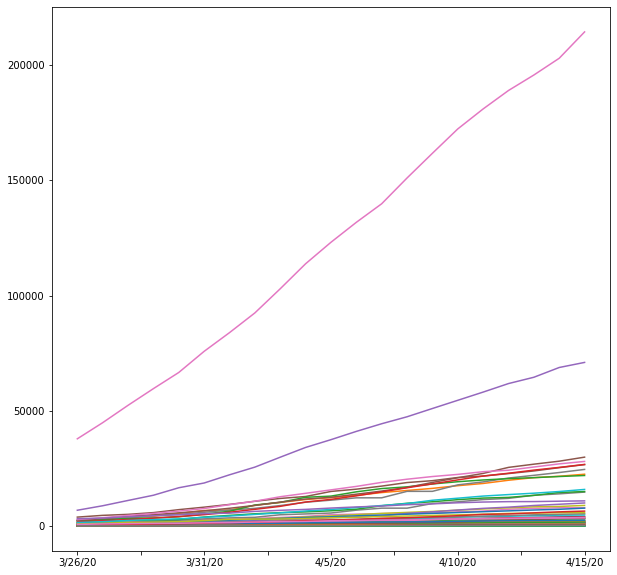

In [31]:
cSumT[len(cSum.index)-33:len(cSumT.index)-1].plot.line(legend = False, figsize = (10,10))

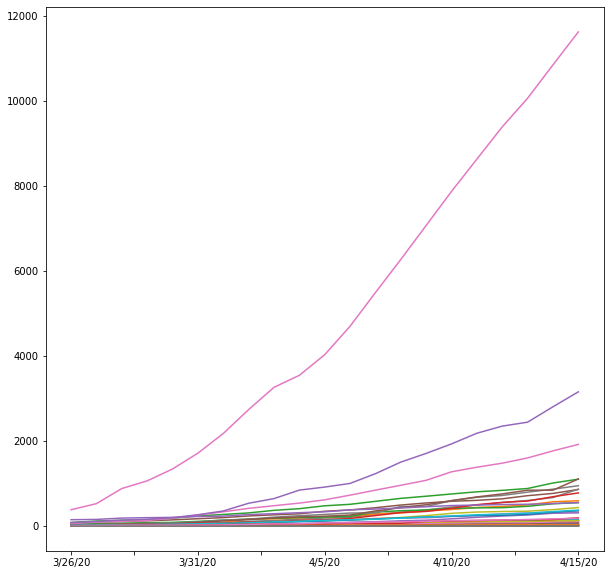

In [32]:
dSumT[len(dSum.index)-33:len(dSumT.index)-1].plot.line(legend = False, figsize = (10,10))

#### Slope of Confirmed in the US (29635)

In [33]:
print ( "%10d" % (cSumWSlope['slope'].sum()))

     27016


#### Slope of Dead in the US (1751)

In [34]:
print ( "%10d" % (dSumWSlope['slope'].sum()))

      2122
